In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from descartes import PolygonPatch
import matplotlib.colors as colors
%matplotlib inline

In [2]:
usa = gpd.read_file('data/cb_2018_us_state_20m.shp').sort_values(by=['name'])

In [3]:
as_st = pd.read_csv('data/asthma-state.csv')

In [4]:
conc = usa.merge(as_st, left_on='name', right_on='State' )

In [5]:
conc = conc.loc[~conc['name'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

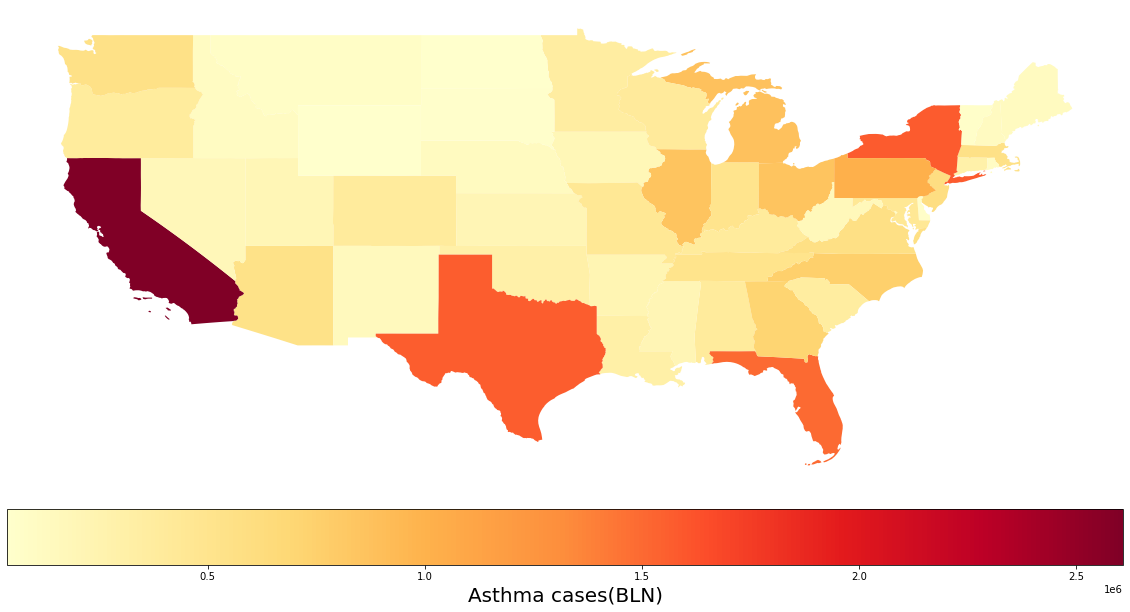

In [6]:
cma='YlOrRd'
norm = colors.Normalize(vmin=conc.Number.min(), vmax=conc.Number.max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cma)
fig, ax = plt.subplots(figsize=(15, 7))
ax.axis('off')
conc.plot(column='Number', cmap=cma, legend=False, ax=ax)
fig.set_figheight(20)
fig.set_figwidth(20)
ax_cbar = fig.colorbar(cbar, ax=ax, orientation='horizontal',pad=.02)# add colorbar
ax_cbar.set_label('Asthma cases(BLN)', fontsize=20)# add label for the colorbar